In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.figure_factory as ff
from termcolor import colored

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [73]:
sleep_data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].fillna('None')
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,50,Software Engineer,7.3,4,84,5,Normal Weight,130/86,81,9163,None
1,2,Female,39,Accountant,8.0,9,80,3,Normal Weight,115/78,67,7500,None
2,3,Female,40,Lawyer,8.2,7,63,3,Normal,120/80,65,8992,None
3,4,Male,30,Salesperson,5.2,3,38,5,Overweight,135/88,87,5375,Sleep Apnea
4,5,Male,60,Scientist,6.8,6,50,6,Obese,135/88,90,3540,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,52496,Male,67,Veterinarian,7.4,6,51,6,Normal,122/78,70,7832,None
52496,52497,Female,27,Architect,5.9,3,39,7,Obese,140/92,87,5231,Sleep Apnea
52497,52498,Female,65,Accountant,8.5,8,75,3,Normal Weight,122/78,76,9071,None
52498,52499,Male,68,Sales Representative,7.7,9,81,2,Normal Weight,115/75,66,5427,None


**Dataset Information:**

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [74]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                52500 non-null  int64  
 1   Gender                   52500 non-null  object 
 2   Age                      52500 non-null  int64  
 3   Occupation               52500 non-null  object 
 4   Sleep Duration           52500 non-null  float64
 5   Quality of Sleep         52500 non-null  int64  
 6   Physical Activity Level  52500 non-null  int64  
 7   Stress Level             52500 non-null  int64  
 8   BMI Category             52500 non-null  object 
 9   Blood Pressure           52500 non-null  object 
 10  Heart Rate               52500 non-null  int64  
 11  Daily Steps              52500 non-null  int64  
 12  Sleep Disorder           52500 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [75]:
sleep_data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [76]:
#for statistical info
sleep_data.describe().style.background_gradient(cmap='Blues')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,26250.500000,45.391143,6.523177,5.732533,51.334514,5.631181,76.990419,6071.899962
std,15155.588903,13.248312,1.158096,2.083818,18.309196,2.205864,7.070667,2383.366023
min,1.000000,22.000000,4.000000,2.000000,20.000000,1.000000,60.000000,2000.000000
25%,13125.750000,34.000000,5.600000,4.000000,38.000000,4.000000,72.000000,4200.000000
50%,26250.500000,45.000000,6.500000,6.000000,49.000000,6.000000,77.000000,5606.000000
75%,39375.250000,57.000000,7.500000,7.000000,63.000000,7.000000,82.000000,7837.000000
max,52500.000000,70.000000,9.000000,10.000000,95.000000,10.000000,92.000000,12000.000000


In [77]:
#for statistical info including string values
sleep_data.describe(include='O').style.set_properties(**{'background-color': "#3790A7", 'color': '#E2EEF3'})

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,52500,52500,52500,52500,52500
unique,2,26,4,34,3
top,Male,Lawyer,Normal,135/88,None
freq,26331,2745,17947,4240,24651


In [78]:
classes=(sleep_data['Sleep Disorder'].unique(),None)
print('The outputs from the classification are :',classes)
sleep_data['Sleep Disorder'].value_counts()

The outputs from the classification are : (array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object), None)


Sleep Disorder
None           24651
Sleep Apnea    14063
Insomnia       13786
Name: count, dtype: int64

In [79]:

fig = px.histogram(sleep_data, x='Sleep Disorder', 
                   barmode="group", color='Sleep Disorder',
                   color_discrete_sequence=['white', "#15927D", "#93D6CB"],
                   text_auto=True)

fig.update_layout(title='<b>Distribution of People with Sleep Disorders<b>',
                  title_font={'size': 25},
                  title_x=0.5,
                  paper_bgcolor="#DEF0EB",
                  plot_bgcolor="#DEF0EA",
                  showlegend=True)

fig.update_yaxes(showgrid=True)
fig.show()

In [80]:
Gender=sleep_data['Gender'].unique(),None
print('The values of Sex column are :',Gender)
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

The values of Sex column are : (array(['Male', 'Female'], dtype=object), None)


Sleep Disorder  Gender
Insomnia        Female     6930
                Male       6856
None            Male      12455
                Female    12196
Sleep Apnea     Female     7043
                Male       7020
Name: count, dtype: int64

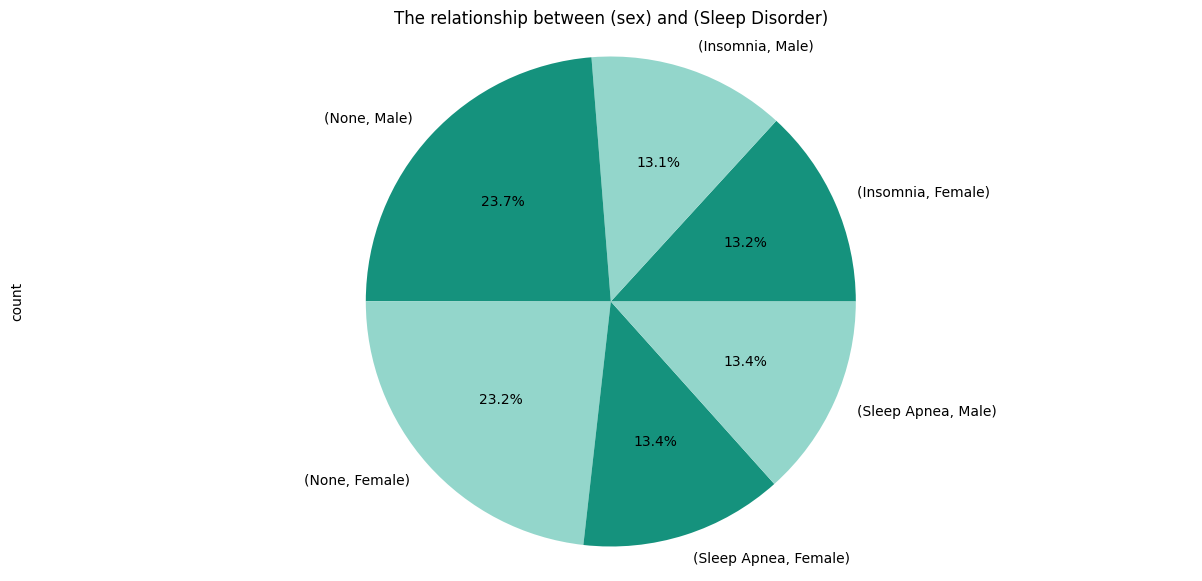

In [81]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=["#15927D","#93D6CB",'#15927D','#93D6CB','#15927D','#93D6CB'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

In [82]:
jobs=sleep_data['Occupation'].unique(),None
print('The types of jobs in the dataset are:',jobs)

The types of jobs in the dataset are: (array(['Software Engineer', 'Accountant', 'Lawyer', 'Salesperson',
       'Scientist', 'Sales Representative', 'Manager', 'Teacher',
       'Doctor', 'Nurse', 'Engineer', 'Analyst', 'Pharmacist',
       'Administrator', 'Designer', 'Consultant', 'Dentist', 'Journalist',
       'Pilot', 'Marketing Specialist', 'Electrician', 'Architect',
       'Mechanic', 'HR Manager', 'Chef', 'Veterinarian'], dtype=object), None)


In [83]:
sleep_data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Lawyer                  816
                Doctor                  815
                Salesperson             770
                Teacher                 757
                Accountant              753
                                       ... 
Sleep Apnea     Marketing Specialist    200
                Dentist                 195
                Veterinarian            192
                HR Manager              191
                Pilot                   176
Name: count, Length: 78, dtype: int64

In [84]:
occ_sleep = sleep_data.groupby(['Occupation', 'Sleep Disorder']).size().reset_index(name='Count')

fig = px.bar(occ_sleep, 
             x='Occupation', 
             y='Count', 
             color='Sleep Disorder',
             title='<b>Sleep Disorders by Occupation</b>',
             barmode='group',
             color_discrete_map={'None': 'white', 'Insomnia': '#15927D', 'Sleep Apnea': '#93D6CB'})

fig.update_layout(paper_bgcolor="#DEF0EB", plot_bgcolor="#DEF0EA", title_x=0.5)
fig.show()